In [1]:
## Import liabrarey
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA & Visualization¶

In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.duplicated().sum()

0

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience'>

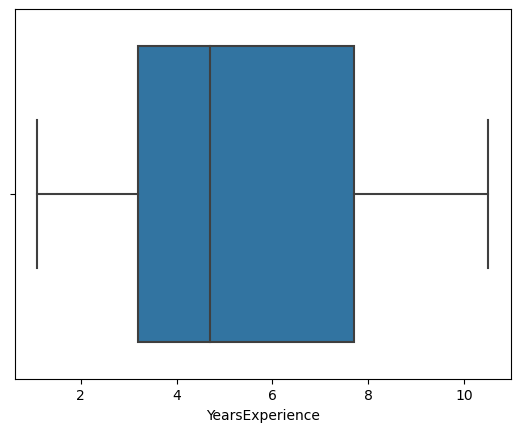

In [6]:
## Outlier detection

sns.boxplot(df['YearsExperience'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

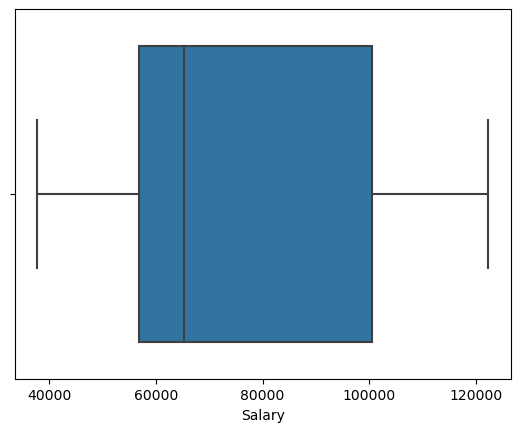

In [7]:
sns.boxplot(df['Salary'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


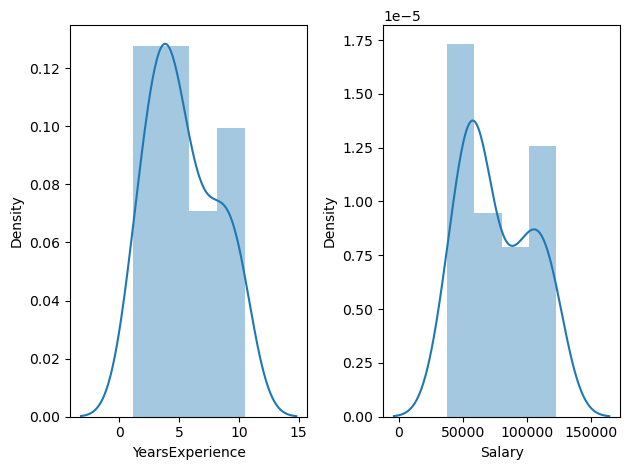

In [8]:
## Check distribution

plt.subplot(1,2,1)
sns.distplot(df['YearsExperience'])

plt.subplot(1,2,2)
sns.distplot(df['Salary'])

plt.tight_layout()

In [10]:
## To check amount of skewness

df['YearsExperience'].skew()

0.37956024064804106

In [11]:
df['Salary'].skew()

0.35411967922959153

# Log Transformation

In [12]:
df['log_YearsExperience']=np.log(df['YearsExperience'])
df['log_Salary']=np.log(df['Salary'])

In [13]:
df

,YearsExperience,Salary,log_YearsExperience,log_Salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906
5,2.9,56642.0,1.064711,10.944506
6,3.0,60150.0,1.098612,11.004597
7,3.2,54445.0,1.163151,10.904946
8,3.2,64445.0,1.163151,11.073567
9,3.7,57189.0,1.308333,10.954117


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


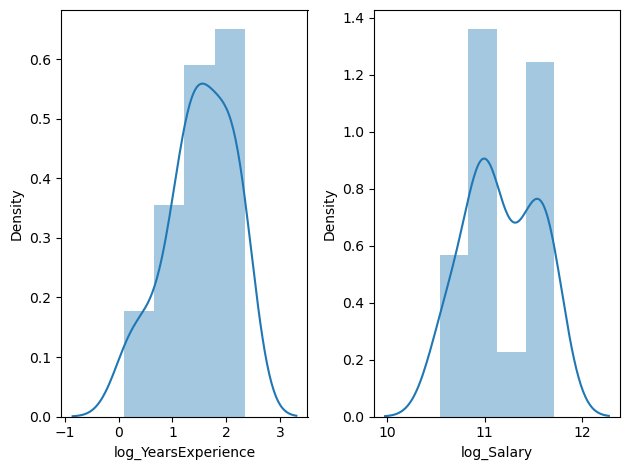

In [16]:
plt.subplot(1,2,1)
sns.distplot(df['log_YearsExperience'])

plt.subplot(1,2,2)
sns.distplot(df['log_Salary'])
plt.tight_layout()

# Squareroot Transformation

In [17]:
df['sqrt_YearsExperiece']=np.sqrt(df['YearsExperience'])
df['sqrt_Salary']=np.sqrt(df['Salary'])
df

,YearsExperience,Salary,log_YearsExperience,log_Salary,sqrt_YearsExperiece,sqrt_Salary
0,1.1,39343.0,0.095310,10.580073,1.048809,198.350700
1,1.3,46205.0,0.262364,10.740843,1.140175,214.953483
2,1.5,37731.0,0.405465,10.538237,1.224745,194.244691
3,2.0,43525.0,0.693147,10.681091,1.414214,208.626460
4,2.2,39891.0,0.788457,10.593906,1.483240,199.727314
5,2.9,56642.0,1.064711,10.944506,1.702939,237.995798
6,3.0,60150.0,1.098612,11.004597,1.732051,245.254969
7,3.2,54445.0,1.163151,10.904946,1.788854,233.334524
8,3.2,64445.0,1.163151,11.073567,1.788854,253.860198
9,3.7,57189.0,1.308333,10.954117,1.923538,239.142217


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqrt_Salary', ylabel='Density'>

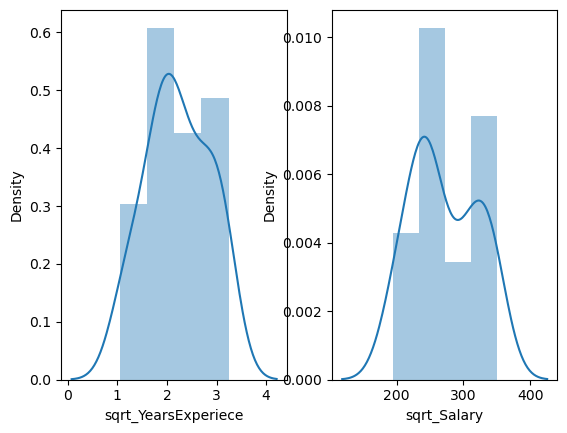

In [22]:
plt.subplot(1,2,1)
sns.distplot(df['sqrt_YearsExperiece'])

plt.subplot(1,2,2)
sns.distplot(df['sqrt_Salary'])

In [26]:
df['sqrt_YearsExperiece'].skew()

-0.04919608394250605

In [27]:
df['sqrt_Salary'].skew()

0.16904336802767353

# Correlation Analysis

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

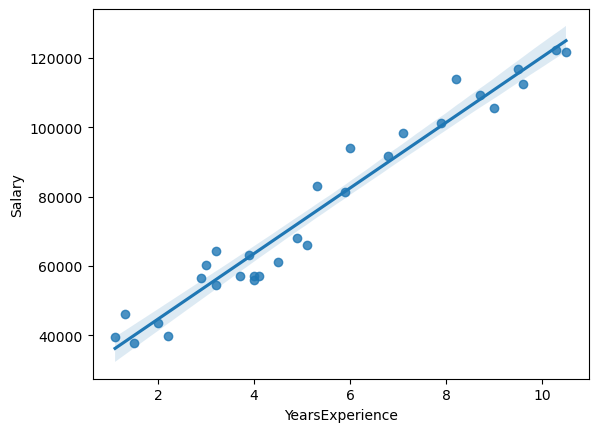

In [23]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'])

In [24]:
df.corr()

,YearsExperience,Salary,log_YearsExperience,log_Salary,sqrt_YearsExperiece,sqrt_Salary
YearsExperience,1.000000,0.978242,0.953797,0.965384,0.989850,0.974595
Salary,0.978242,1.000000,0.924061,0.988531,0.964884,0.997315
log_YearsExperience,0.953797,0.924061,1.000000,0.951428,0.986620,0.939719
log_Salary,0.965384,0.988531,0.951428,1.000000,0.971269,0.996920
sqrt_YearsExperiece,0.989850,0.964884,0.986620,0.971269,1.000000,0.970541
sqrt_Salary,0.974595,0.997315,0.939719,0.996920,0.970541,1.000000


<AxesSubplot:>

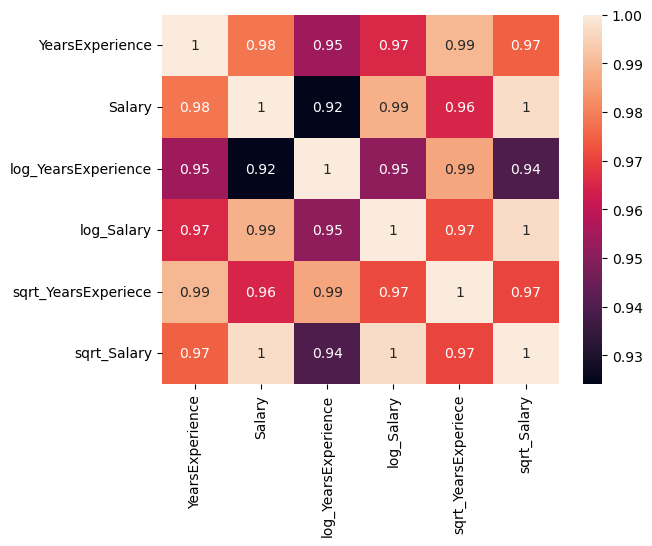

In [25]:
sns.heatmap(df.corr(),annot=True)

In [15]:
## YearsExperience & Salary are strongly related

# Model Building

In [28]:
model=smf.ols('Salary~YearsExperience',data=df).fit()

# Model Accuracy

In [29]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [31]:
model.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [33]:
## Rsquared value

model.rsquared

0.9569566641435086

# Model prediction¶

In [34]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [36]:
## manual Prediction
# y=mx+c
# let 
x=2
y= (9449.962321)*x+25792.200199

In [37]:
y

44692.124841

In [38]:
## Prediction for new data

newdf=pd.DataFrame({'YearsExperience':[3,3.5,5,6.7,8]})

In [39]:
predictions=model.predict(newdf)

In [40]:
predictions

0     54142.087163
1     58867.068324
2     73042.011806
3     89106.947752
4    101391.898770
dtype: float64

In [41]:
New_pred=pd.DataFrame({'YearsExperience':[3,3.5,5,6.7,8],
                       'predictions':predictions})

In [42]:
New_pred

,YearsExperience,predictions
0,3.0,54142.087163
1,3.5,58867.068324
2,5.0,73042.011806
3,6.7,89106.947752
4,8.0,101391.898770
